In [37]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns



In [38]:
data = pd.read_csv("house_prices_dataset.csv")

In [39]:
data.head()

,Size,Number of Bedrooms,Number of Bathrooms,Location,Age of the House,Garage Size,Sale Price
0,3974,1,2,Countryside,81,2,594026
1,1660,3,2,Downtown,97,1,847135
2,2094,2,1,Suburb,74,3,163776
3,1930,2,2,Countryside,75,2,230494
4,1895,1,1,Downtown,48,1,242971


In [40]:
data.isnull().sum()

Size                   0
Number of Bedrooms     0
Number of Bathrooms    0
Location               0
Age of the House       0
Garage Size            0
Sale Price             0
dtype: int64

In [41]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [42]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 3974 1 2 81 2]
 [0.0 1.0 0.0 1660 3 2 97 1]
 [0.0 0.0 1.0 2094 2 1 74 3]
 [1.0 0.0 0.0 1930 2 2 75 2]
 [0.0 1.0 0.0 1895 1 1 48 1]
 [0.0 0.0 1.0 3892 1 1 78 0]
 [1.0 0.0 0.0 2438 2 3 56 0]
 [0.0 0.0 1.0 2969 2 3 94 1]
 [0.0 0.0 1.0 1266 1 2 92 1]
 [0.0 0.0 1.0 2038 1 3 25 2]
 [0.0 0.0 1.0 1130 3 3 17 0]
 [1.0 0.0 0.0 2282 2 2 95 1]
 [1.0 0.0 0.0 2935 1 3 85 0]
 [1.0 0.0 0.0 3971 2 2 37 1]
 [0.0 1.0 0.0 3719 2 2 80 0]
 [1.0 0.0 0.0 930 3 2 86 3]
 [0.0 0.0 1.0 2485 1 3 87 2]
 [1.0 0.0 0.0 1569 3 2 49 0]
 [0.0 0.0 1.0 3191 2 2 7 3]
 [0.0 1.0 0.0 2315 2 1 40 0]
 [0.0 0.0 1.0 3653 2 2 5 0]
 [0.0 0.0 1.0 3233 1 2 68 3]
 [0.0 0.0 1.0 2015 2 2 43 0]
 [0.0 1.0 0.0 1755 3 2 63 0]
 [1.0 0.0 0.0 3124 2 2 28 2]
 [1.0 0.0 0.0 1984 1 3 27 3]
 [0.0 1.0 0.0 1259 3 2 10 3]
 [0.0 0.0 1.0 821 2 2 64 1]
 [1.0 0.0 0.0 3100 2 1 18 0]
 [0.0 1.0 0.0 1547 2 1 8 2]
 [1.0 0.0 0.0 3704 3 3 26 0]
 [0.0 1.0 0.0 1274 3 2 33 0]
 [0.0 0.0 1.0 1882 3 1 43 1]
 [1.0 0.0 0.0 3358 3 2 67 0]
 [0.0 1.0 0.0 2847 

In [43]:
np.set_printoptions(threshold=np.inf)
print(X)

[[1.0 0.0 0.0 3974 1 2 81 2]
 [0.0 1.0 0.0 1660 3 2 97 1]
 [0.0 0.0 1.0 2094 2 1 74 3]
 [1.0 0.0 0.0 1930 2 2 75 2]
 [0.0 1.0 0.0 1895 1 1 48 1]
 [0.0 0.0 1.0 3892 1 1 78 0]
 [1.0 0.0 0.0 2438 2 3 56 0]
 [0.0 0.0 1.0 2969 2 3 94 1]
 [0.0 0.0 1.0 1266 1 2 92 1]
 [0.0 0.0 1.0 2038 1 3 25 2]
 [0.0 0.0 1.0 1130 3 3 17 0]
 [1.0 0.0 0.0 2282 2 2 95 1]
 [1.0 0.0 0.0 2935 1 3 85 0]
 [1.0 0.0 0.0 3971 2 2 37 1]
 [0.0 1.0 0.0 3719 2 2 80 0]
 [1.0 0.0 0.0 930 3 2 86 3]
 [0.0 0.0 1.0 2485 1 3 87 2]
 [1.0 0.0 0.0 1569 3 2 49 0]
 [0.0 0.0 1.0 3191 2 2 7 3]
 [0.0 1.0 0.0 2315 2 1 40 0]
 [0.0 0.0 1.0 3653 2 2 5 0]
 [0.0 0.0 1.0 3233 1 2 68 3]
 [0.0 0.0 1.0 2015 2 2 43 0]
 [0.0 1.0 0.0 1755 3 2 63 0]
 [1.0 0.0 0.0 3124 2 2 28 2]
 [1.0 0.0 0.0 1984 1 3 27 3]
 [0.0 1.0 0.0 1259 3 2 10 3]
 [0.0 0.0 1.0 821 2 2 64 1]
 [1.0 0.0 0.0 3100 2 1 18 0]
 [0.0 1.0 0.0 1547 2 1 8 2]
 [1.0 0.0 0.0 3704 3 3 26 0]
 [0.0 1.0 0.0 1274 3 2 33 0]
 [0.0 0.0 1.0 1882 3 1 43 1]
 [1.0 0.0 0.0 3358 3 2 67 0]
 [0.0 1.0 0.0 2847 

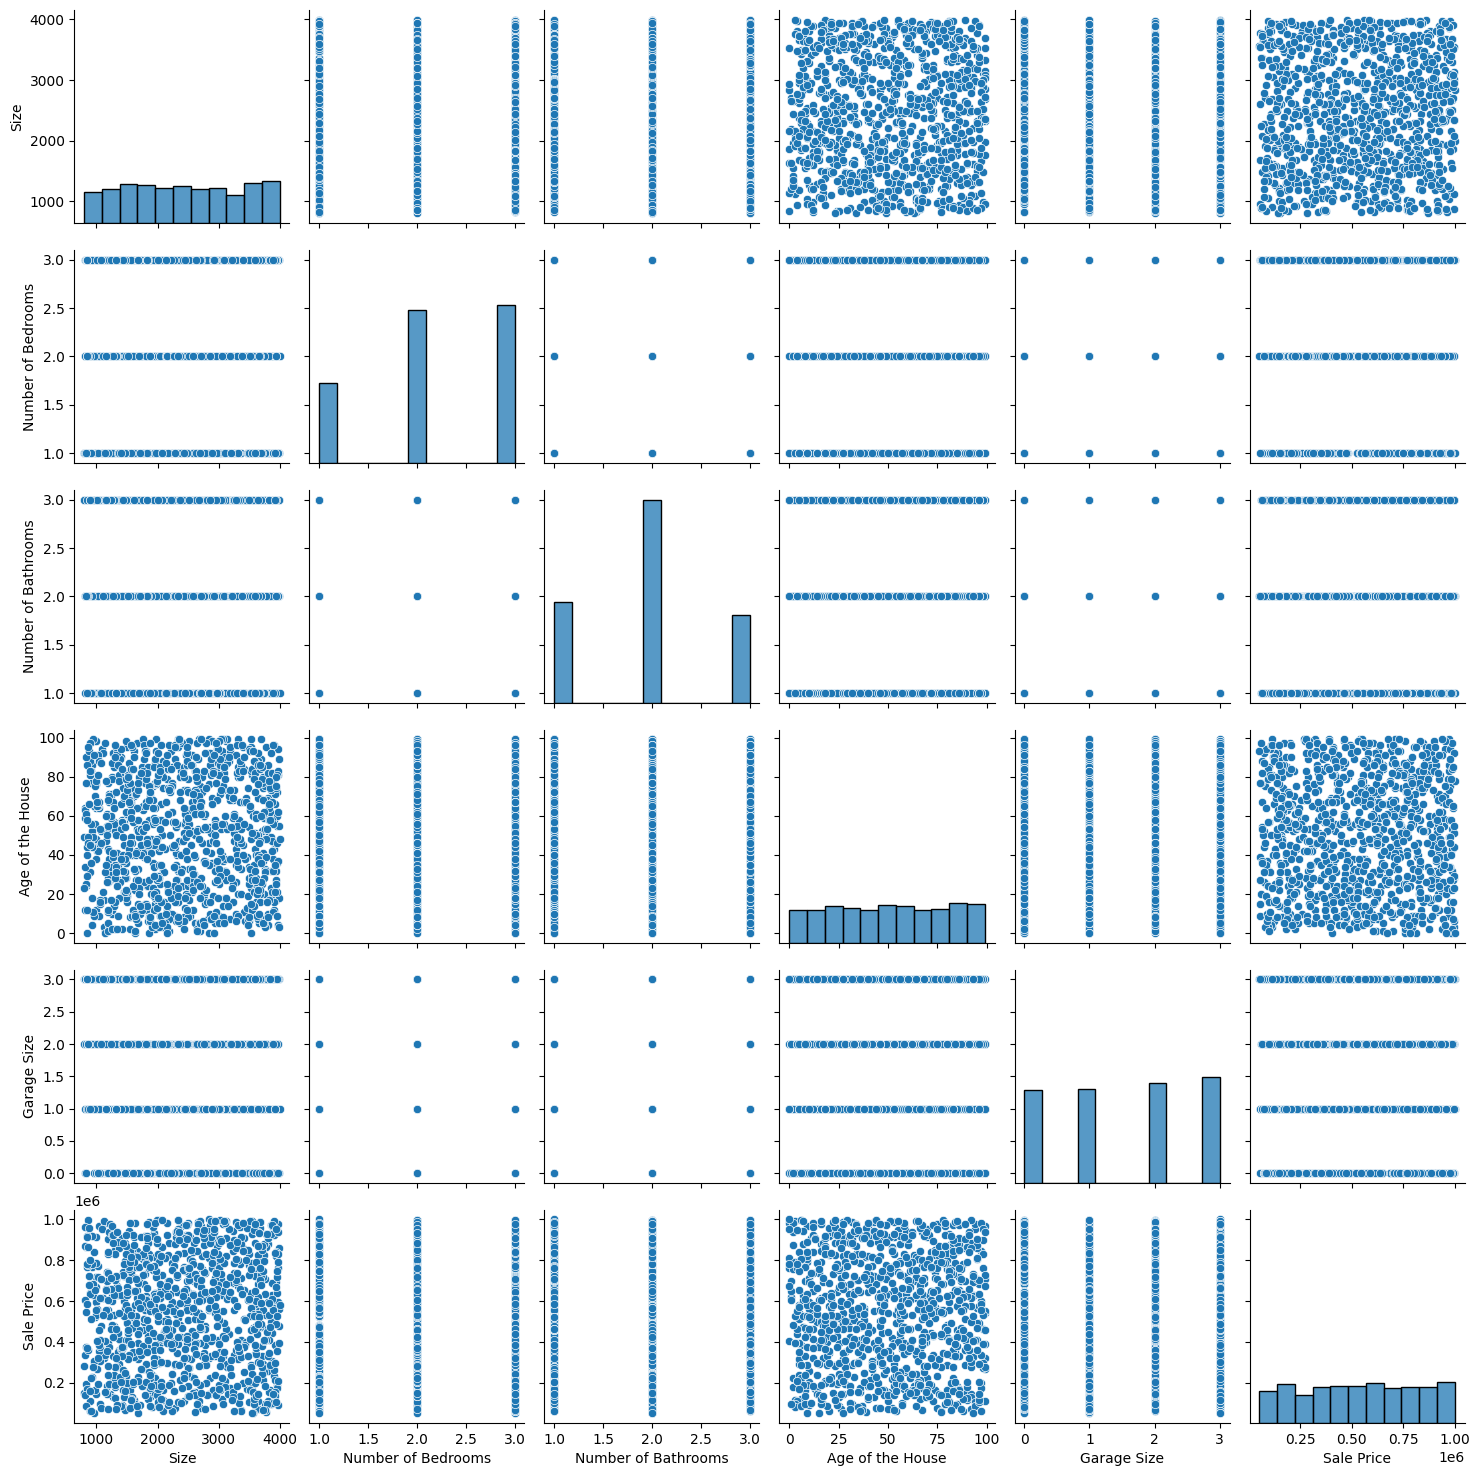

In [44]:
sns.pairplot(data)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [46]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [47]:
regressor = LinearRegression()
regressor.fit(X_train_scaler, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test_scaler)
np.set_printoptions(precision=2) #we display values with only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[558626.12 565249.  ]
 [483618.12 613634.  ]
 [546594.12 972056.  ]
 [520994.12 148064.  ]
 [560674.12 161462.  ]
 [587810.12 133384.  ]
 [494882.12 336073.  ]
 [516386.12 912605.  ]
 [484642.12 390414.  ]
 [519458.12 984550.  ]
 [528162.12 376284.  ]
 [562722.12 820974.  ]
 [596770.12 100519.  ]
 [543266.12 490015.  ]
 [557346.12 537387.  ]
 [530210.12 222502.  ]
 [516898.12 590277.  ]
 [580642.12 509158.  ]
 [517922.12 286371.  ]
 [524066.12 936788.  ]
 [485666.12 645376.  ]
 [490018.12 513685.  ]
 [506914.12 906874.  ]
 [507170.12 407776.  ]
 [527394.12 396030.  ]
 [552738.12 408105.  ]
 [575778.12 474724.  ]
 [500002.12 539415.  ]
 [502050.12 565795.  ]
 [479522.12 847135.  ]
 [501282.12 922437.  ]
 [540962.12 972564.  ]
 [510242.12 869497.  ]
 [515874.12 941490.  ]
 [510754.12 359509.  ]
 [481058.12 680532.  ]
 [514594.12 992585.  ]
 [556834.12 528697.  ]
 [517410.12 994556.  ]
 [600610.12 331373.  ]
 [544034.12 845775.  ]
 [584482.12 382066.  ]
 [561442.12  93169.  ]
 [579106.12

In [49]:
r2_score(y_test, y_pred)

-0.05264991793984475

# Polynomial Regression

In [50]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train_scaler)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [51]:
y_pred_poly = regressor.predict(poly_reg.transform(X_test_scaler))
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y_test.reshape(len(y_test), 1)),1))

[[ 5.07e+05  5.65e+05]
 [ 5.83e+05  6.14e+05]
 [ 3.87e+05  9.72e+05]
 [ 3.95e+05  1.48e+05]
 [ 5.04e+05  1.61e+05]
 [ 6.13e+05  1.33e+05]
 [ 4.31e+05  3.36e+05]
 [ 4.88e+05  9.13e+05]
 [ 1.36e+05  3.90e+05]
 [ 5.06e+05  9.85e+05]
 [ 7.12e+05  3.76e+05]
 [ 5.11e+05  8.21e+05]
 [ 9.19e+05  1.01e+05]
 [ 5.69e+05  4.90e+05]
 [ 4.02e+05  5.37e+05]
 [ 5.35e+05  2.23e+05]
 [ 3.05e+05  5.90e+05]
 [ 8.43e+05  5.09e+05]
 [ 3.46e+05  2.86e+05]
 [ 5.07e+05  9.37e+05]
 [ 4.12e+05  6.45e+05]
 [ 1.12e+06  5.14e+05]
 [ 4.28e+05  9.07e+05]
 [ 3.36e+05  4.08e+05]
 [ 3.51e+05  3.96e+05]
 [ 9.58e+05  4.08e+05]
 [ 3.95e+05  4.75e+05]
 [ 4.66e+04  5.39e+05]
 [ 4.40e+05  5.66e+05]
 [ 3.24e+05  8.47e+05]
 [ 2.36e+05  9.22e+05]
 [ 4.48e+05  9.73e+05]
 [ 5.69e+05  8.69e+05]
 [ 4.34e+05  9.41e+05]
 [ 4.80e+05  3.60e+05]
 [ 3.79e+05  6.81e+05]
 [ 6.27e+05  9.93e+05]
 [ 4.58e+05  5.29e+05]
 [ 5.38e+05  9.95e+05]
 [ 6.90e+05  3.31e+05]
 [ 7.41e+05  8.46e+05]
 [ 6.67e+05  3.82e+05]
 [ 4.25e+05  9.32e+04]
 [ 5.51e+05

In [52]:
r2_score(y_test, y_pred_poly)

-0.8170119287405055